In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
img_path = "../output_videos/cropped_img.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

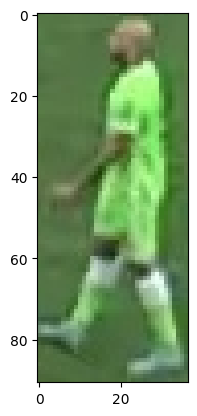

In [6]:
plt.imshow(img)
plt.show()

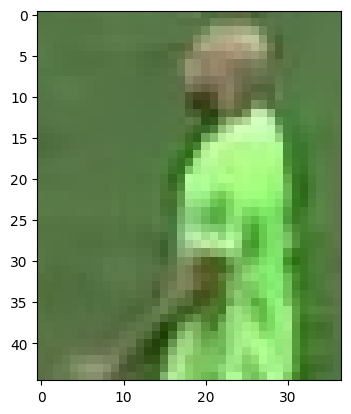

In [7]:
top_half_img = img[0: int(img.shape[0]/2), :]
plt.imshow(top_half_img)

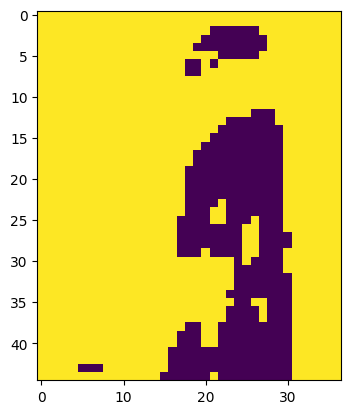

In [10]:
#cluster img into 2 colors, bg and tshirt
img_2d = top_half_img.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(img_2d)

labels = kmeans.labels_
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

plt.imshow(clustered_img)
plt.show()

In [11]:
#differentiate the cluster by what we need (take corners to assume as the bg cluster)
corner_clusters = [clustered_img[0,0], clustered_img[0,-1], clustered_img[-1,0], clustered_img[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [12]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [13]:
kmeans.cluster_centers_[player_cluster]

array([151.15890411, 218.48219178, 122.77808219])